Claudio Sartori©

# Machine Learning - Lab
## Example of Lab exam
### Find the best number of clusters with __k_means__

# Tasks
Find the clusters in the included dataset.

The solution must be produced as a Python Notebook. The notebook must include appropriate comments and must produce:

1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)
1. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (2pt)
1. a clustering schema using a method of your choice exploring a range of parameter values (5pt)
1. the plot of the global inertia (SSD) and silhouette index for the parameter values you examine  (4pt)
1. the optimal parameters of your choice (4pt)
1. a pairplot of the data using as hue the cluster assignment with the optimal parameter (3pt)
1. a plot of the silhouette index for the data points, grouped according to the clusters (4pt)
1. A sorted list of the discovered clusters for decreasing sizes (7pt)


In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

In [2]:
data_file = 'lab_exercise.csv'
delimiter = ','
X = np.loadtxt(data_file, delimiter = delimiter)

In [3]:
X.shape

(1500, 4)

In order to exploit the Pandas DataFrame features we generate `df` from `X`

<AxesSubplot:>

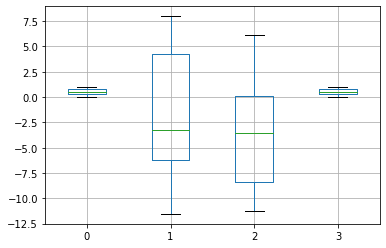

In [4]:
df = pd.DataFrame(X)
df.boxplot()

## 1. Comment on boxplots
Columns 0 and 3 have a range much smaller than 1 and 2. The distributions onf 0 and 3 seem to be equal. Possibly, a min-max rescaling could point out some additional insight. 

Let's look at the pairplots and consider if it is worth to do this transformation.

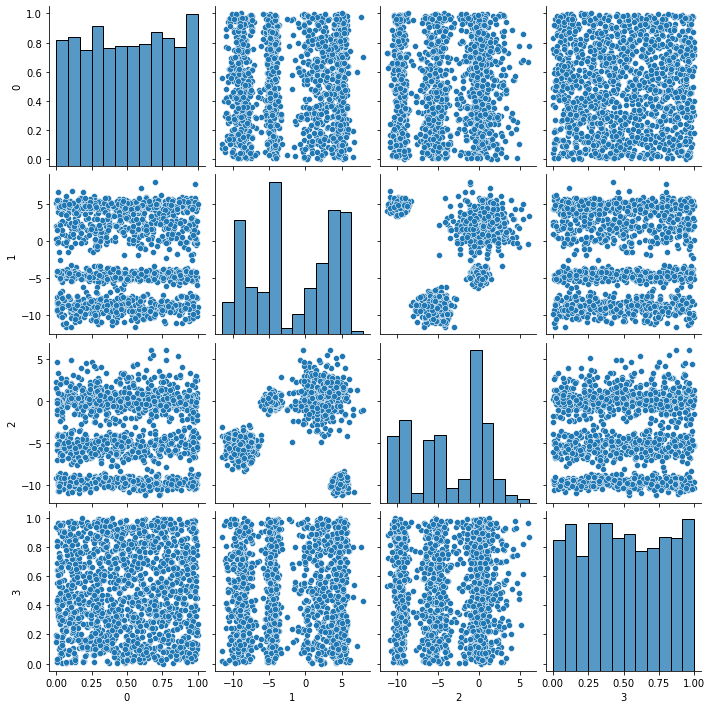

In [5]:
sns.pairplot(df)

## 2. Comments on pairplots
The pairplots show that the two most interesting columns are `1` and `2`, their pairplot shows evident clusters.

The pairplots of `0` and `3` show that those columns are uniformly distributed and do not show any pattern.

In [6]:
int_cols = [1,2] # Interesting columns

## 3. Find a clustering scheme with KMeans 
We will try __k_means__ with a number of clusters varying from 2 to 10

- prepare two emptys lists for inertia and silhouette scores
- For each value of the number of clusters:  
  - initialize an estimator for `KMeans` and `fit_predict`
  - we will store the distortion (from the fitted model) in the variable `distortions`
  - using the function `silhouette_score` from `sklearn.metrics` with arguments the data and the fitted labels, we will fill the variable `silhouette_scores`

Then we will plot the two lists in the y axis, with the range of k in the x axis.
The plot with two different scales in the `y` axis can be done according to the example shown in the notebook `two_scales.ipynb`.

In [7]:
k_range = range(2,11)

In [8]:
distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X,y_km))

## 4. Plot of __inertia__ and __silhouette__

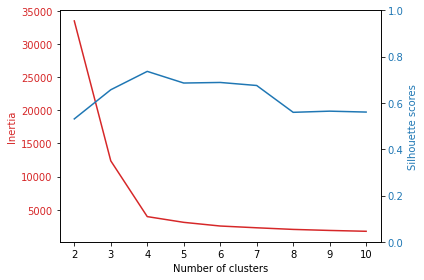

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 5. Show the best value for the parameter(s)

In [10]:
good_k = np.argmax(silhouette_scores) + k_range.start
print("The value of K providing the maximum silhouette index is {}".format(good_k))

The value of K providing the maximum silhouette index is 4


## 6. Cluster with the optimal parameter(s) and show the pairplot

In [11]:
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(X)

In order to show the "hue" with the Seaborn pairplot it is necessary to add the `cluster` column and then specify as `vars` the data columns you want to plot.

In [12]:
df['cluster'] = y_km

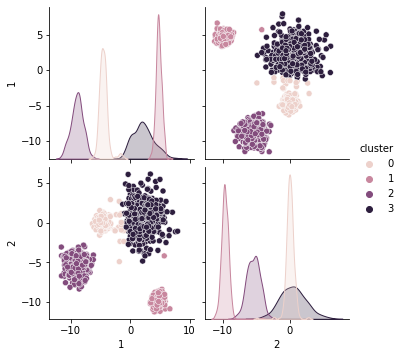

In [13]:
sns.pairplot(df[int_cols + ['cluster']], vars = df[int_cols], hue = 'cluster')

## 7. Quantifying the quality of clustering  via silhouette plots
The silhouette scores for the individual samples are computed with the function `silhouette_samples`

The function `plot_silhouette` produces a 'horizontal bar-plot', with one bar for each sample, where the length of the bar is proportional to the silhouette score of the sample. The bars are grouped for cluster and sorted for decreasing length. 

A vertical line represents the silhouette score, i.e. the average on all the samples

In [14]:
# from plot_silhouette import plot_silhouette
from plot_silhouette2 import plot_silhouette

In [15]:
help(plot_silhouette)

Help on function plot_silhouette in module plot_silhouette2:

plot_silhouette(silhouette_vals, y, colors=<matplotlib.colors.ListedColormap object at 0x7f3d23c270d0>)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples



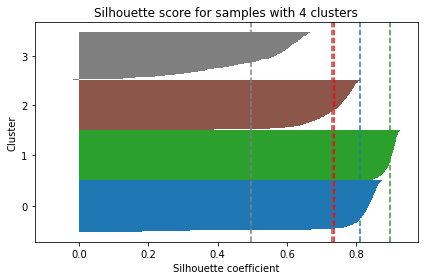

In [16]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

## 8. Sorted list of the discovered clusters for decreasing sizes (7pt)

There are several ways to perform this task. `groupby().size()` returns a dataframe, resetting the index we can name the newly created column with the counts. Then we can sort the values in descending order.

In [17]:
counts = pd.DataFrame(y_km).groupby(0).size().reset_index(name='Count')
counts = counts.rename(columns = {0: 'Cluster'}).sort_values(by = 'Count', ascending = False)
counts

,Cluster,Count
0,0,390
1,1,376
2,2,375
3,3,359


A better solution uses the `value_counts()` method, which counts the values in the with the same label and sorts the results in descending order.

In [18]:
labels = pd.DataFrame(y_km)
counts = pd.DataFrame(labels.value_counts(), columns=['Count']).reset_index()
counts = counts.rename(columns = {0: 'Cluster'})
counts

,Cluster,Count
0,0,390
1,1,376
2,2,375
3,3,359
